In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve,RocCurveDisplay,f1_score,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')



In [4]:
df_train = pd.read_csv('../data/raw/fetal_health.csv')

In [56]:
features = ['prolongued_decelerations','abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability']

# X = df_train.drop('fetal_health',axis = 1)
X = df_train[features]
y = df_train[['fetal_health']]
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)


In [57]:
normal= df_train[(df_train['fetal_health'] == 1)]
suspect= df_train[(df_train['fetal_health'] == 2)]
pathological= df_train[(df_train['fetal_health'] == 3)]

In [58]:
X_train.shape, X_test.shape


((1424, 3), (702, 3))

We will compare classifiers.  

* k-nearest neighbors 
* naive bayes 
* artifical neural network 
* SVM 
* decision tree 
* random forest 

## knn

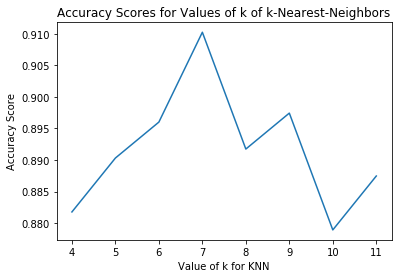

In [60]:
# experimenting with different n values
k_range = list(range(4,12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.811965811965812


In [62]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [67]:
cm = confusion_matrix(y_test, y_pred)

In [68]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])

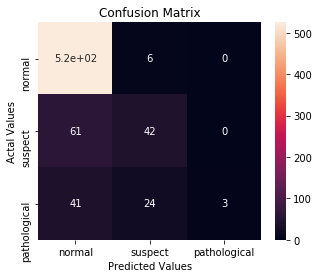

In [69]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.24643874643874644

## naive bayes

In [72]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
y_pred  =  classifier.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [83]:
print("Accuracy score: ",ac)

Accuracy score:  0.8361823361823362


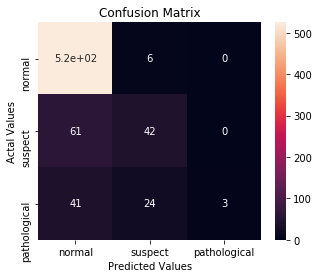

In [76]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [77]:
mean_absolute_error(y_test, y_pred) #does this make sense with the data? 

0.19515669515669515

### decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8888888888888888


In [81]:
mean_absolute_error(y_test, y_pred)  

0.1396011396011396

In [86]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

Pros

    * Decision trees are easy to interpret and visualize.
    * It can easily capture Non-linear patterns.
    * It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
    * It can be used for feature engineering such as predicting missing values, suitable for variable selection.
    * The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

Cons

    * Sensitive to noisy data. It can overfit noisy data.
    * The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
    * Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

from: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

### random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.915954415954416
